In [1]:
# importing basic EDA libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# setting figure parameters and style
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='viridis')

# labelencoder is used for encoding categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# importing logistic regression model
from sklearn.linear_model import LogisticRegression

#importing  test train split 
from sklearn.model_selection import train_test_split

# for scaling the data
from sklearn.preprocessing import StandardScaler

# metics to check the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

In [2]:
#importing Data
df=pd.read_excel(r"C:\Users\Rustham Sorab\Desktop\Data Science\6.Logistic Regression\Raw Data\bank-full.xlsx")

In [3]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# statistics for numeric data
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
# getting stats for object data
df.describe(include = object)

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [8]:
# checking for null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [10]:
# getting values unique entries of target label
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Category count in Target column')

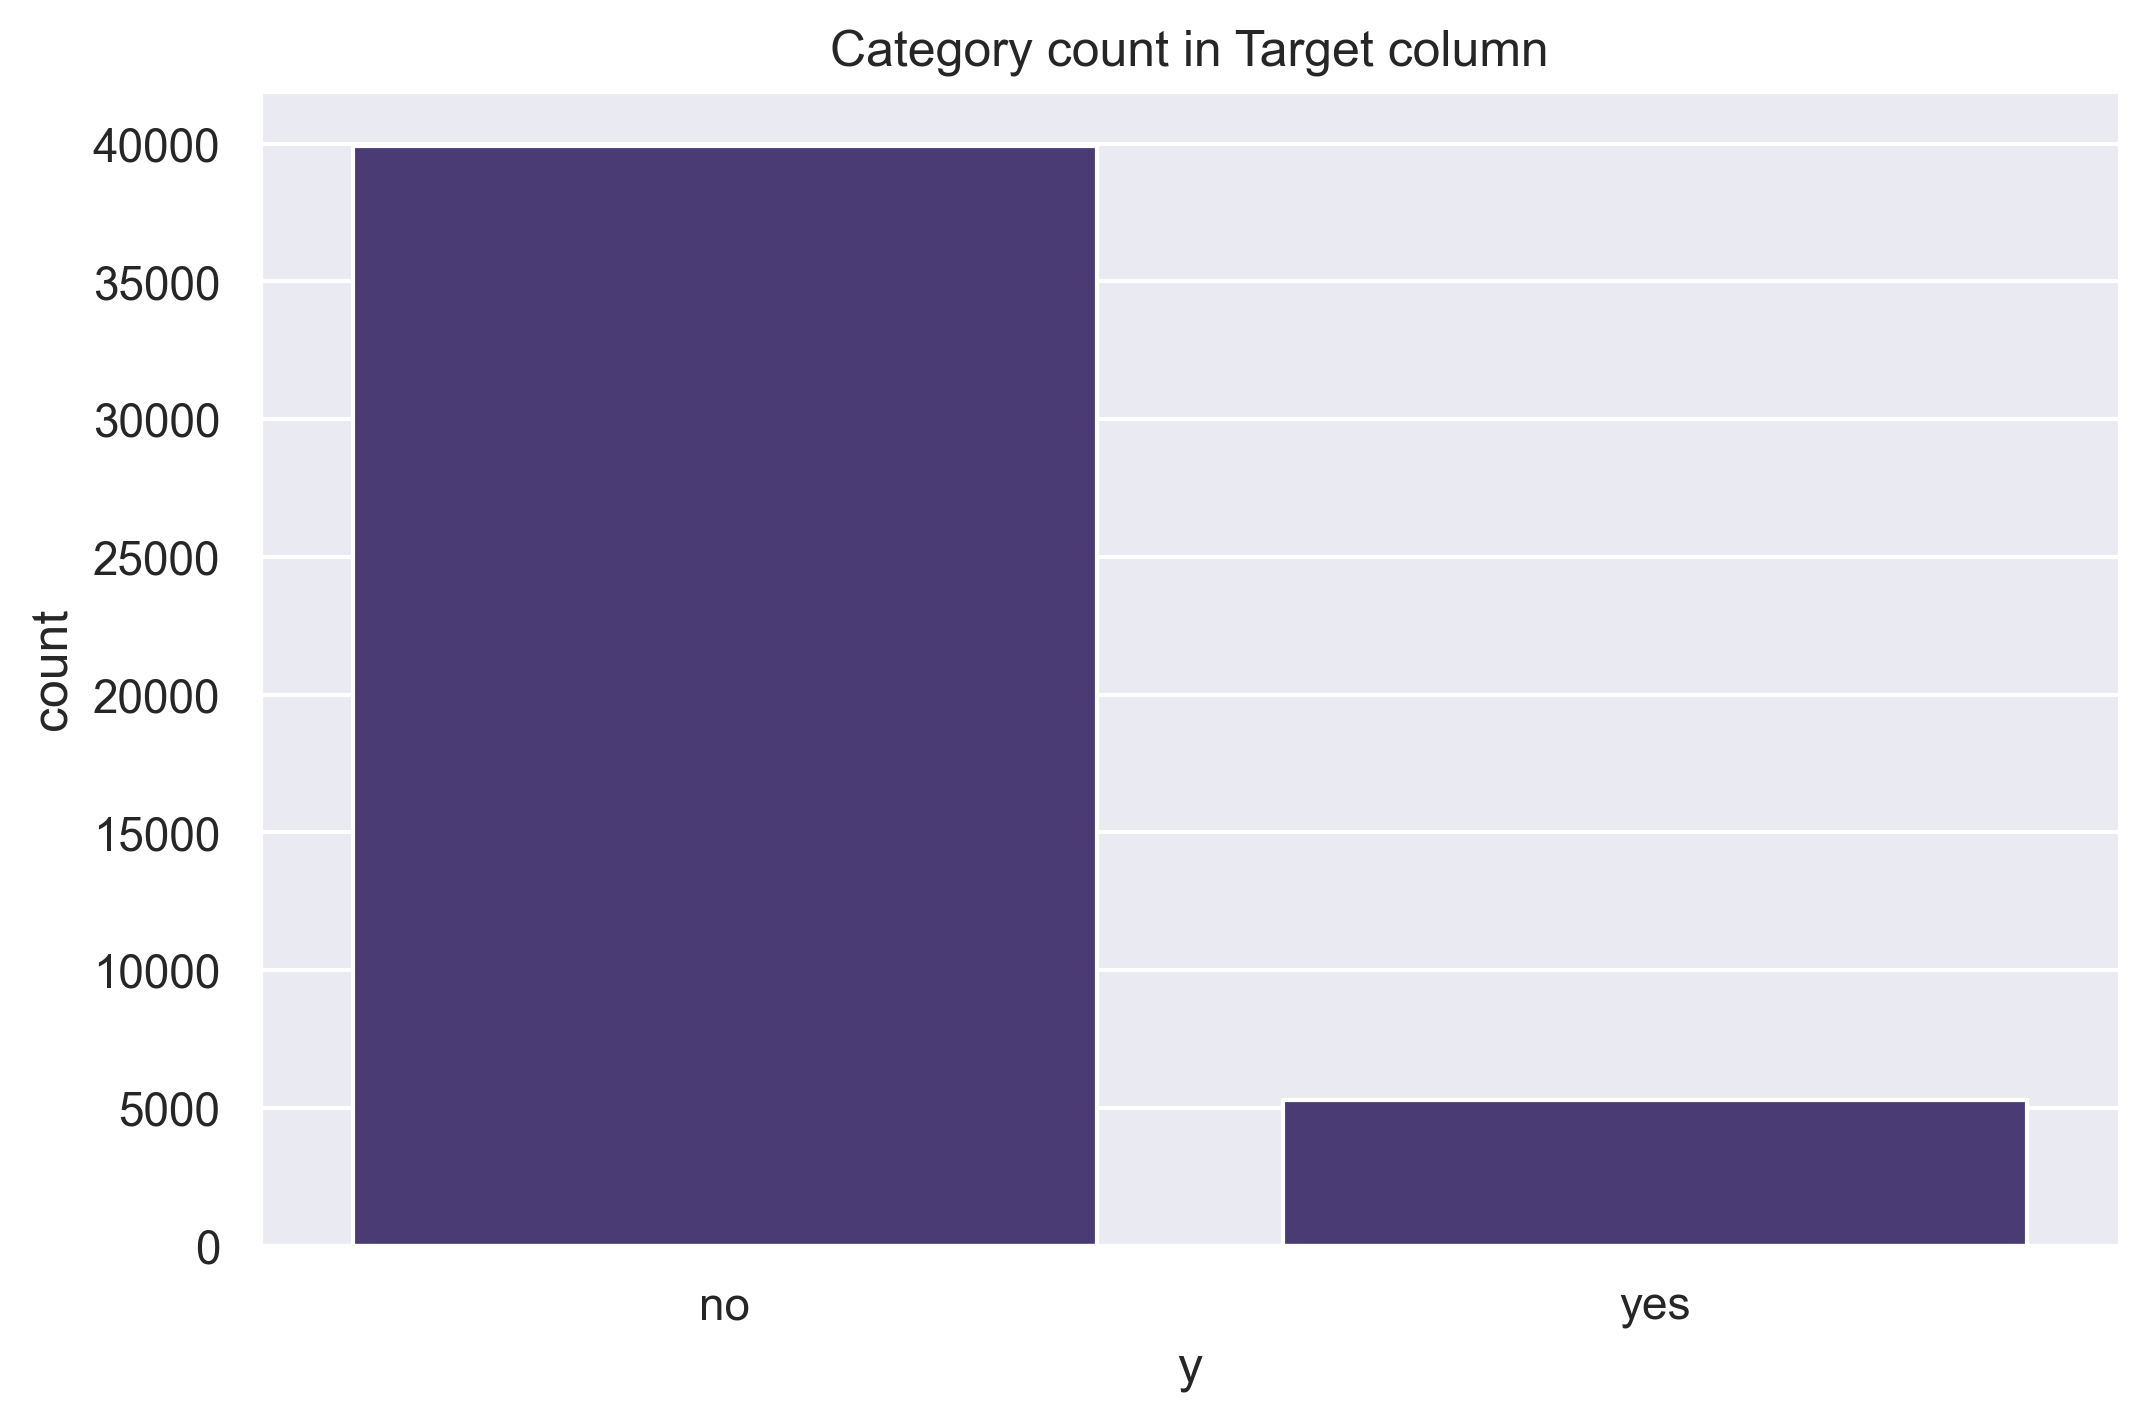

In [11]:
# visualization of target variable
sns.countplot(data = df, x = 'y')
plt.title('Category count in Target column')

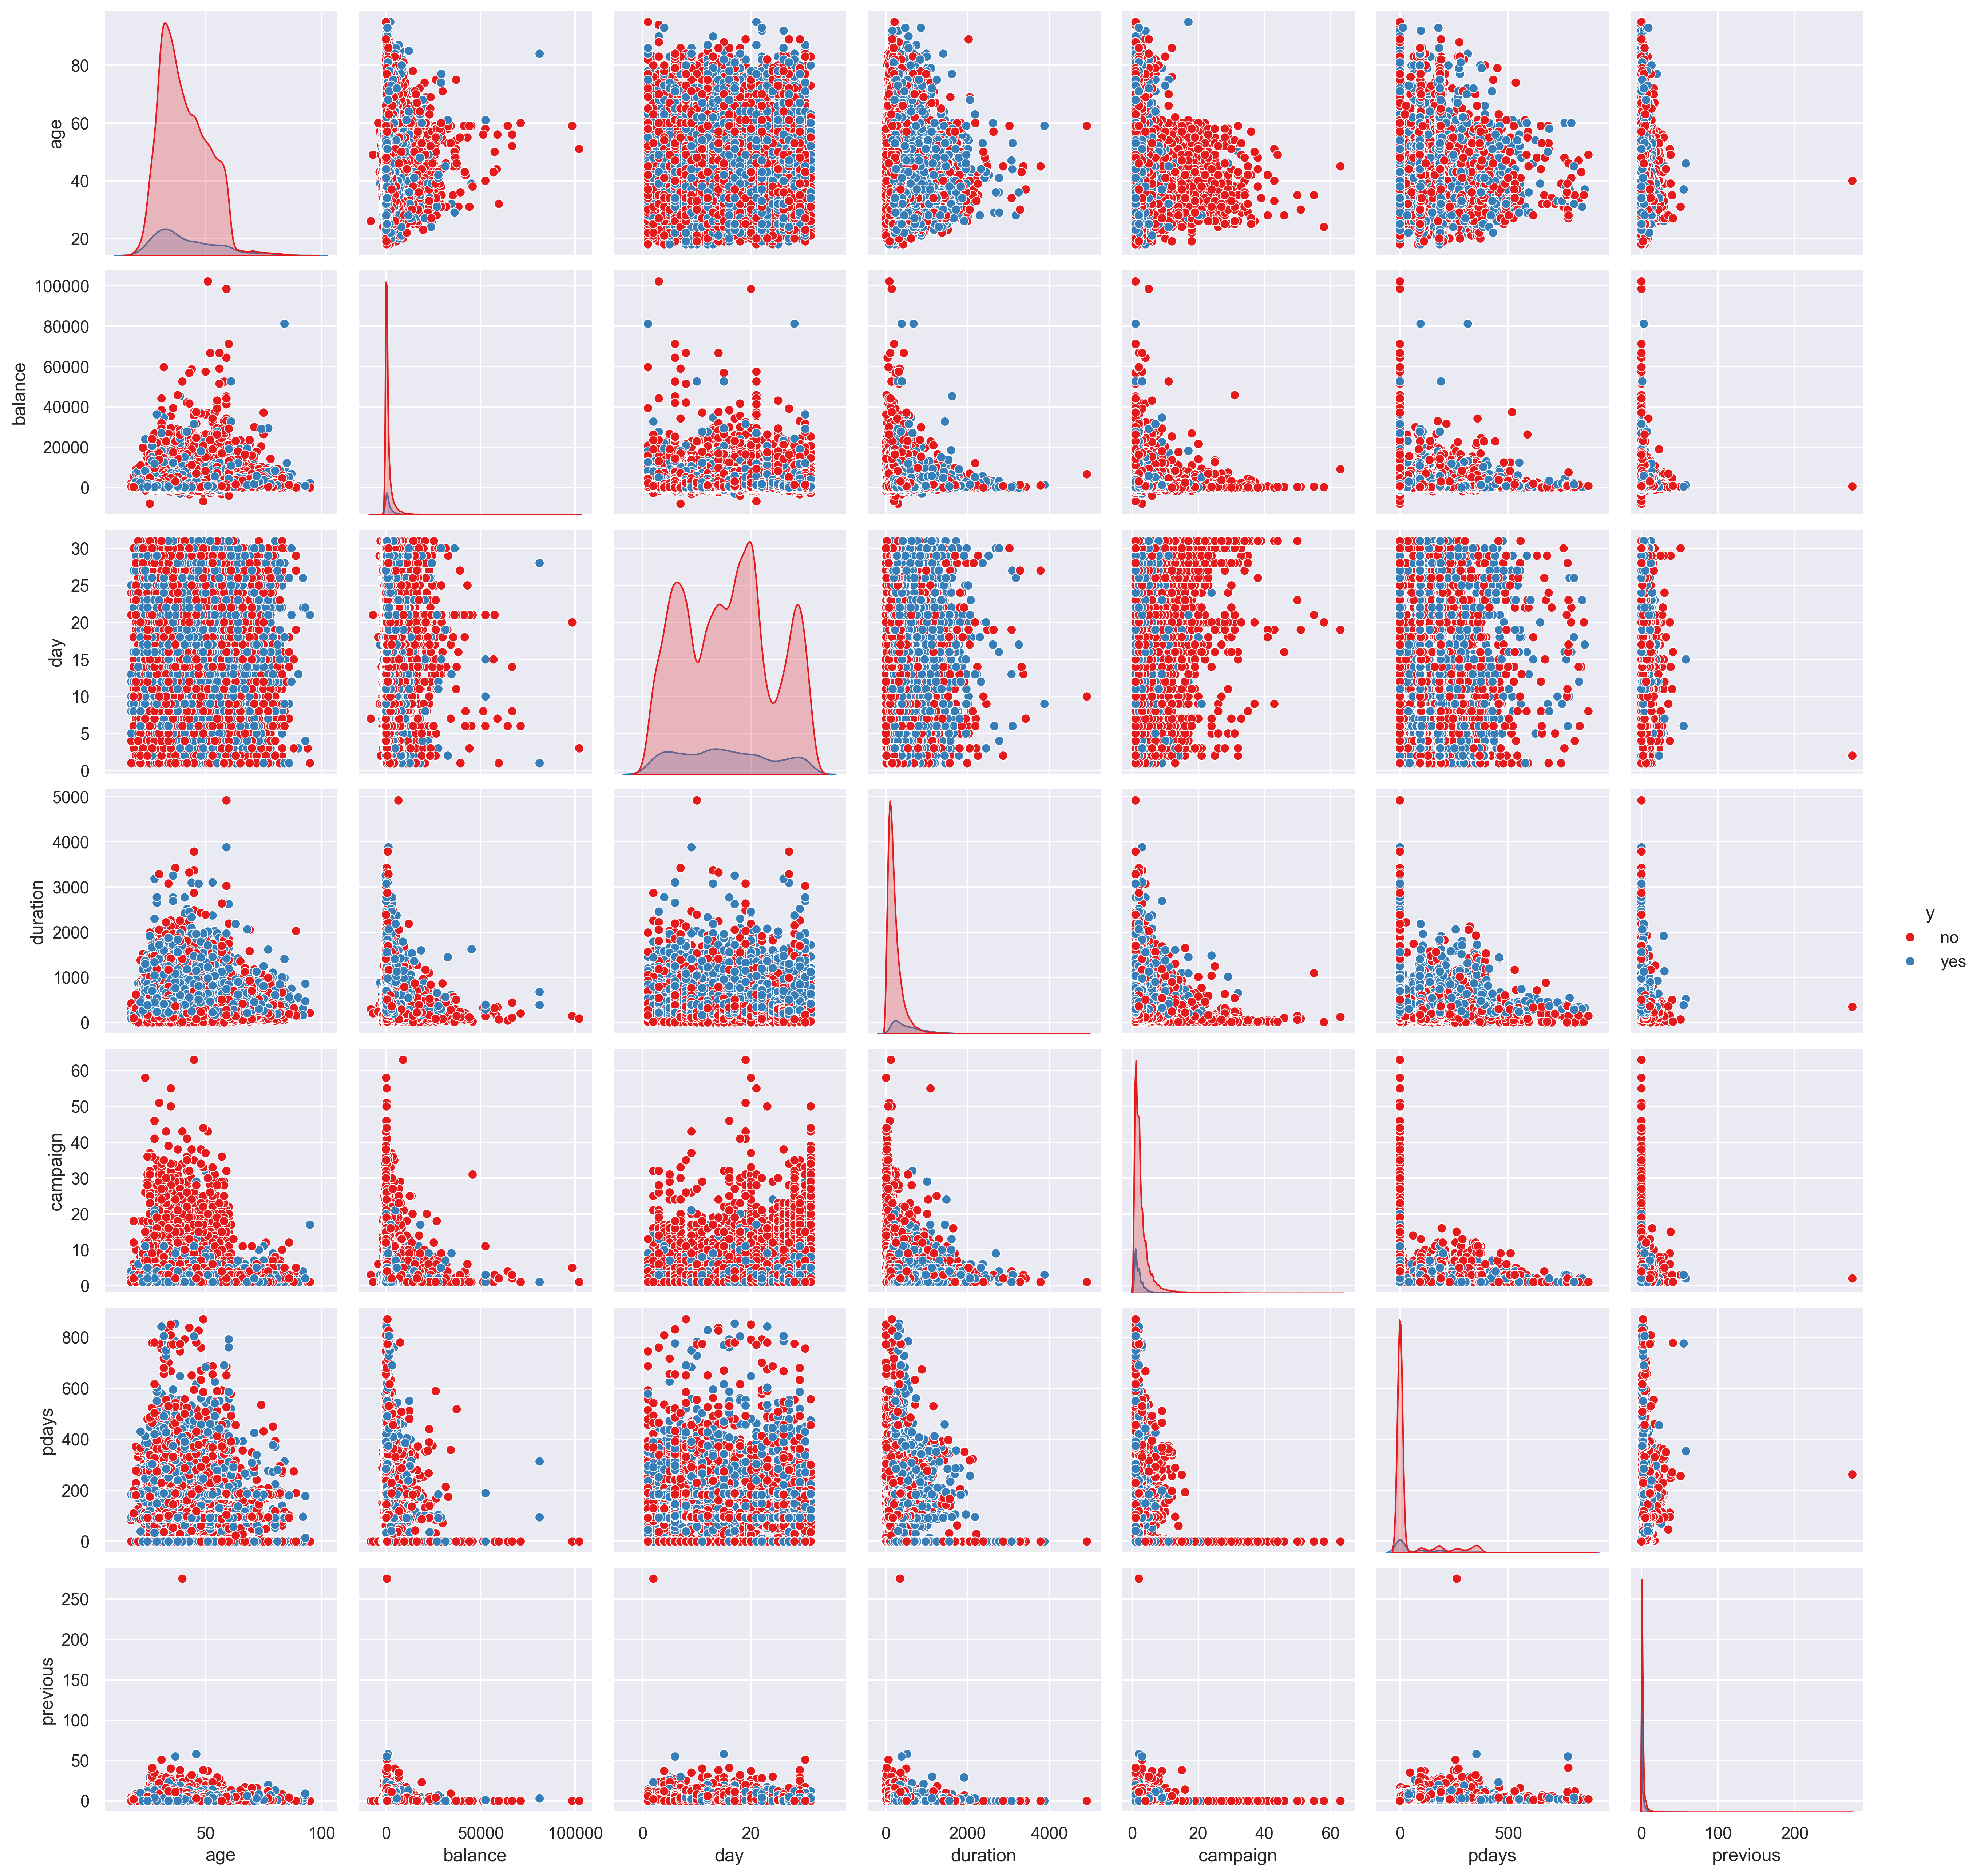

In [12]:
sns.pairplot(data = df, hue = 'y', palette='Set1',)

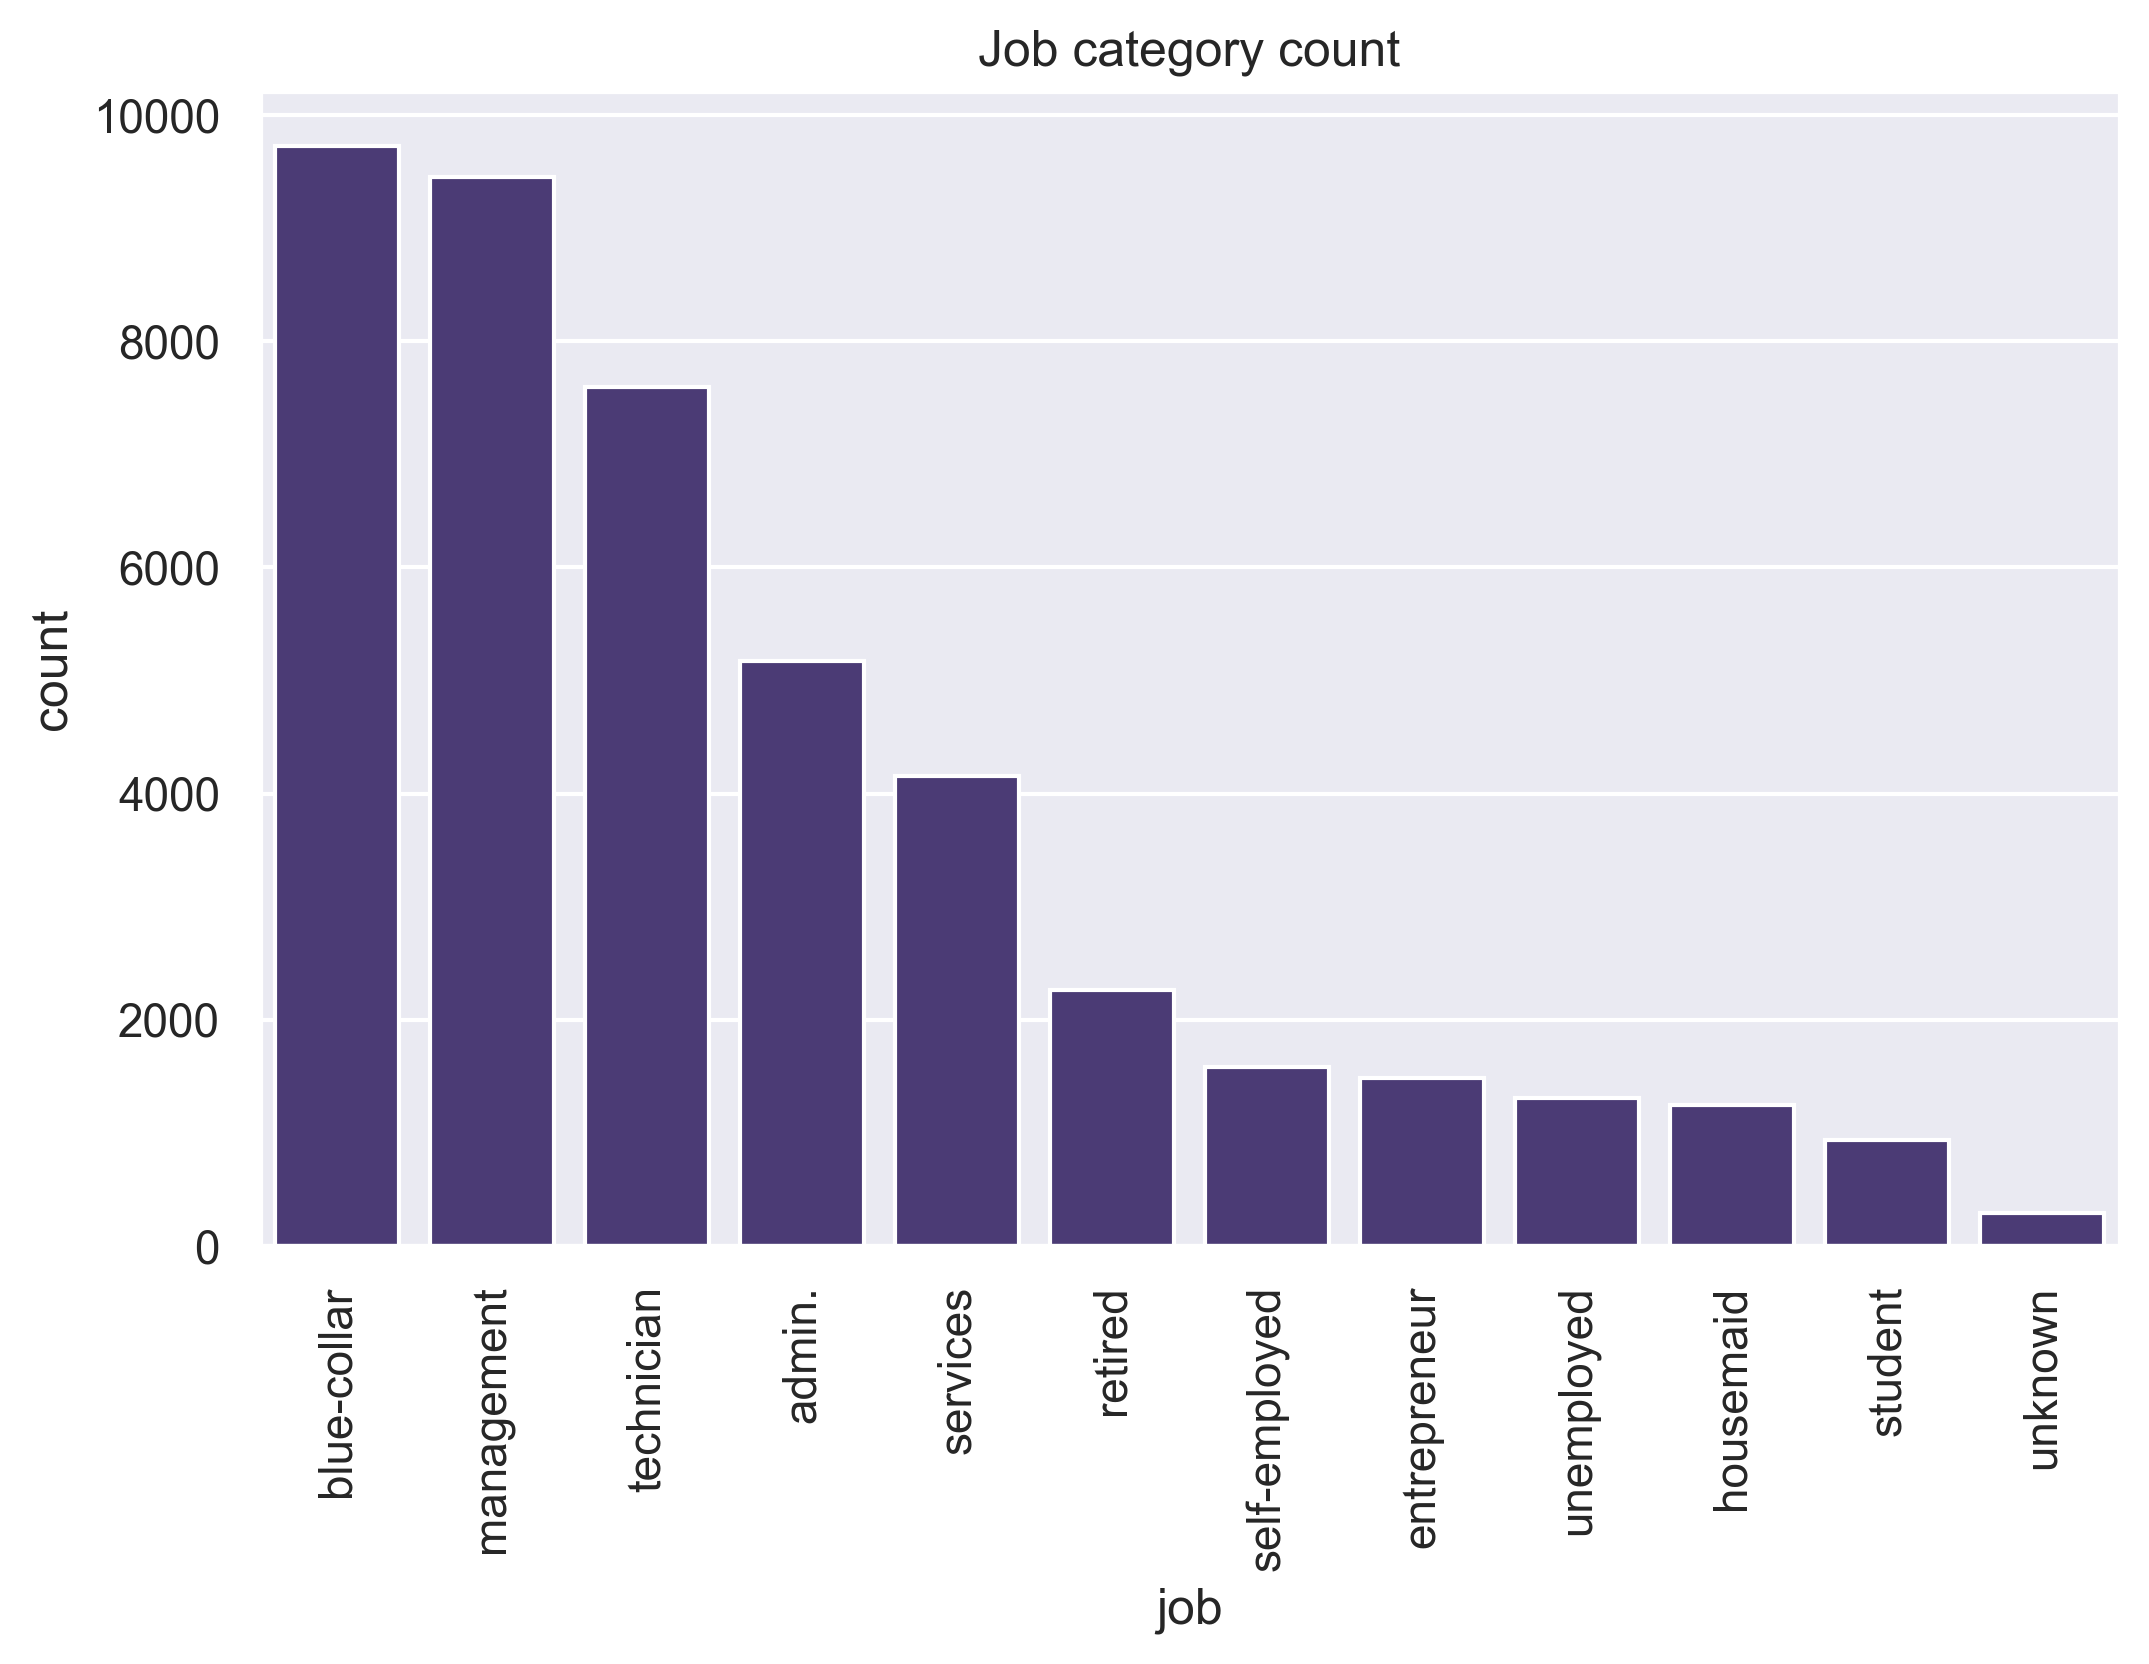

In [13]:
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Job category count')
plt.show()

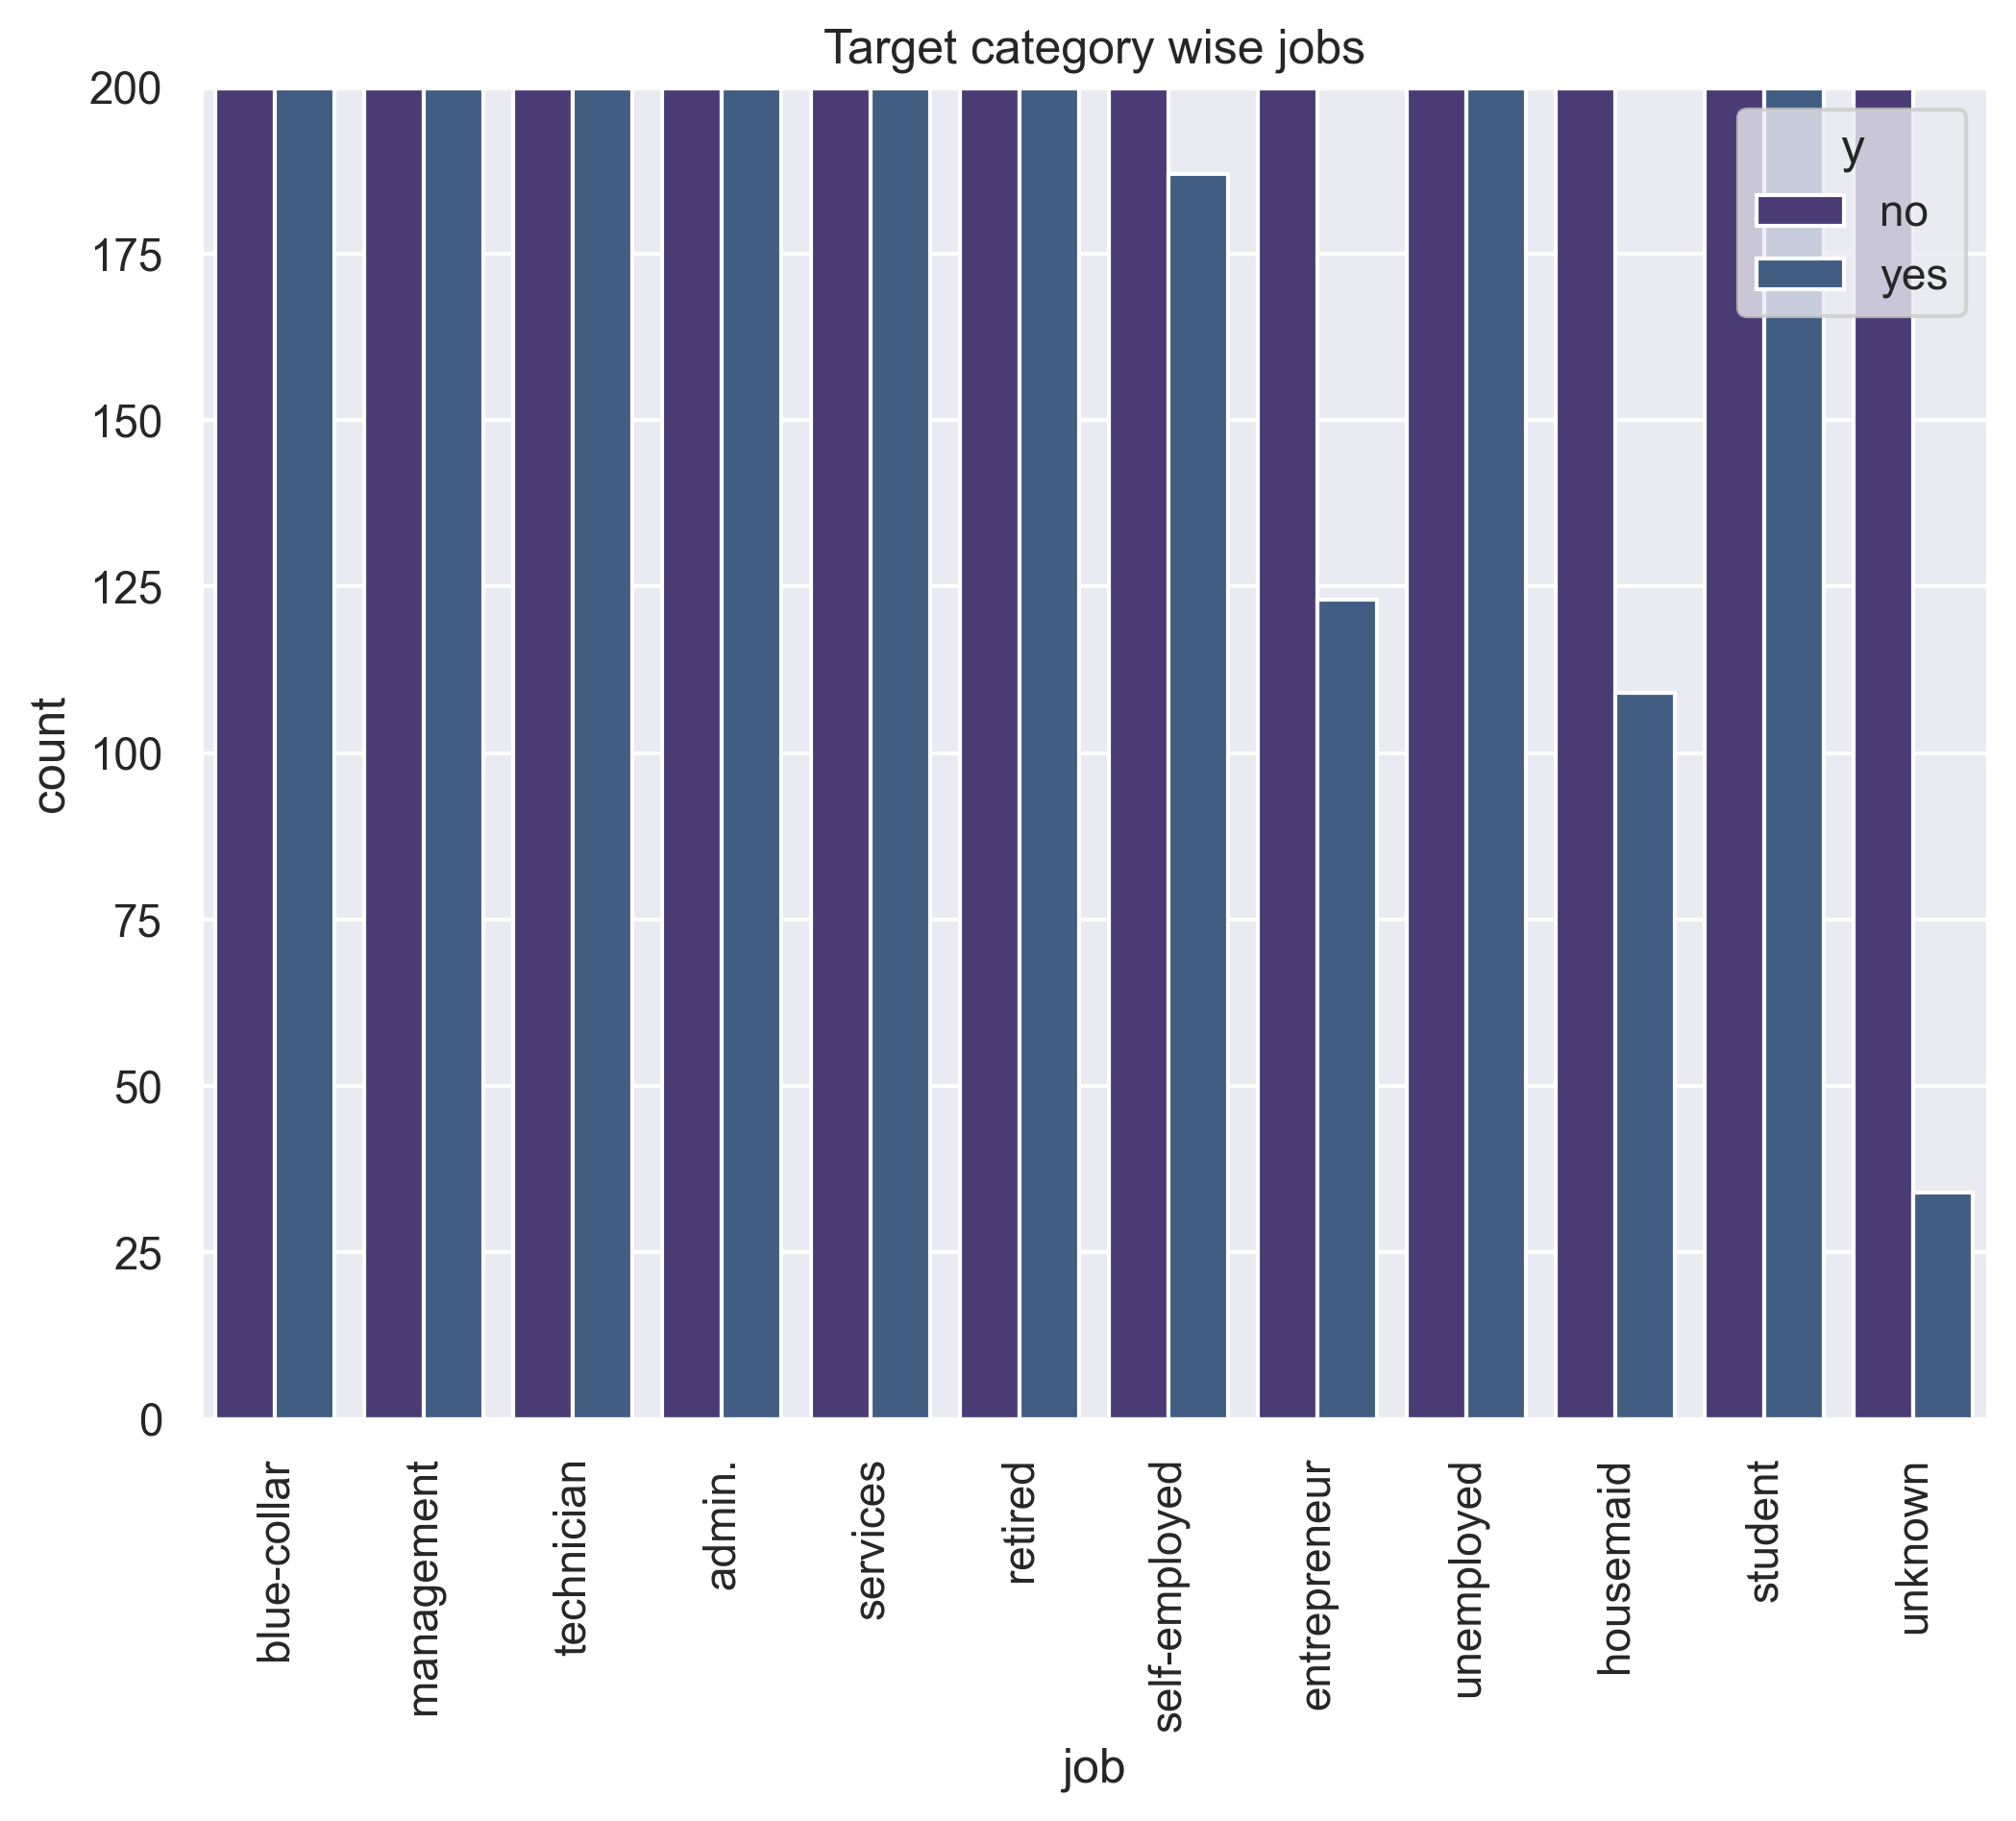

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index, hue = 'y')
plt.xticks(rotation = 90)
plt.ylim(0,200)
plt.title('Target category wise jobs')
plt.show()

Text(0.5, 1.0, 'marital status category wise percentage')

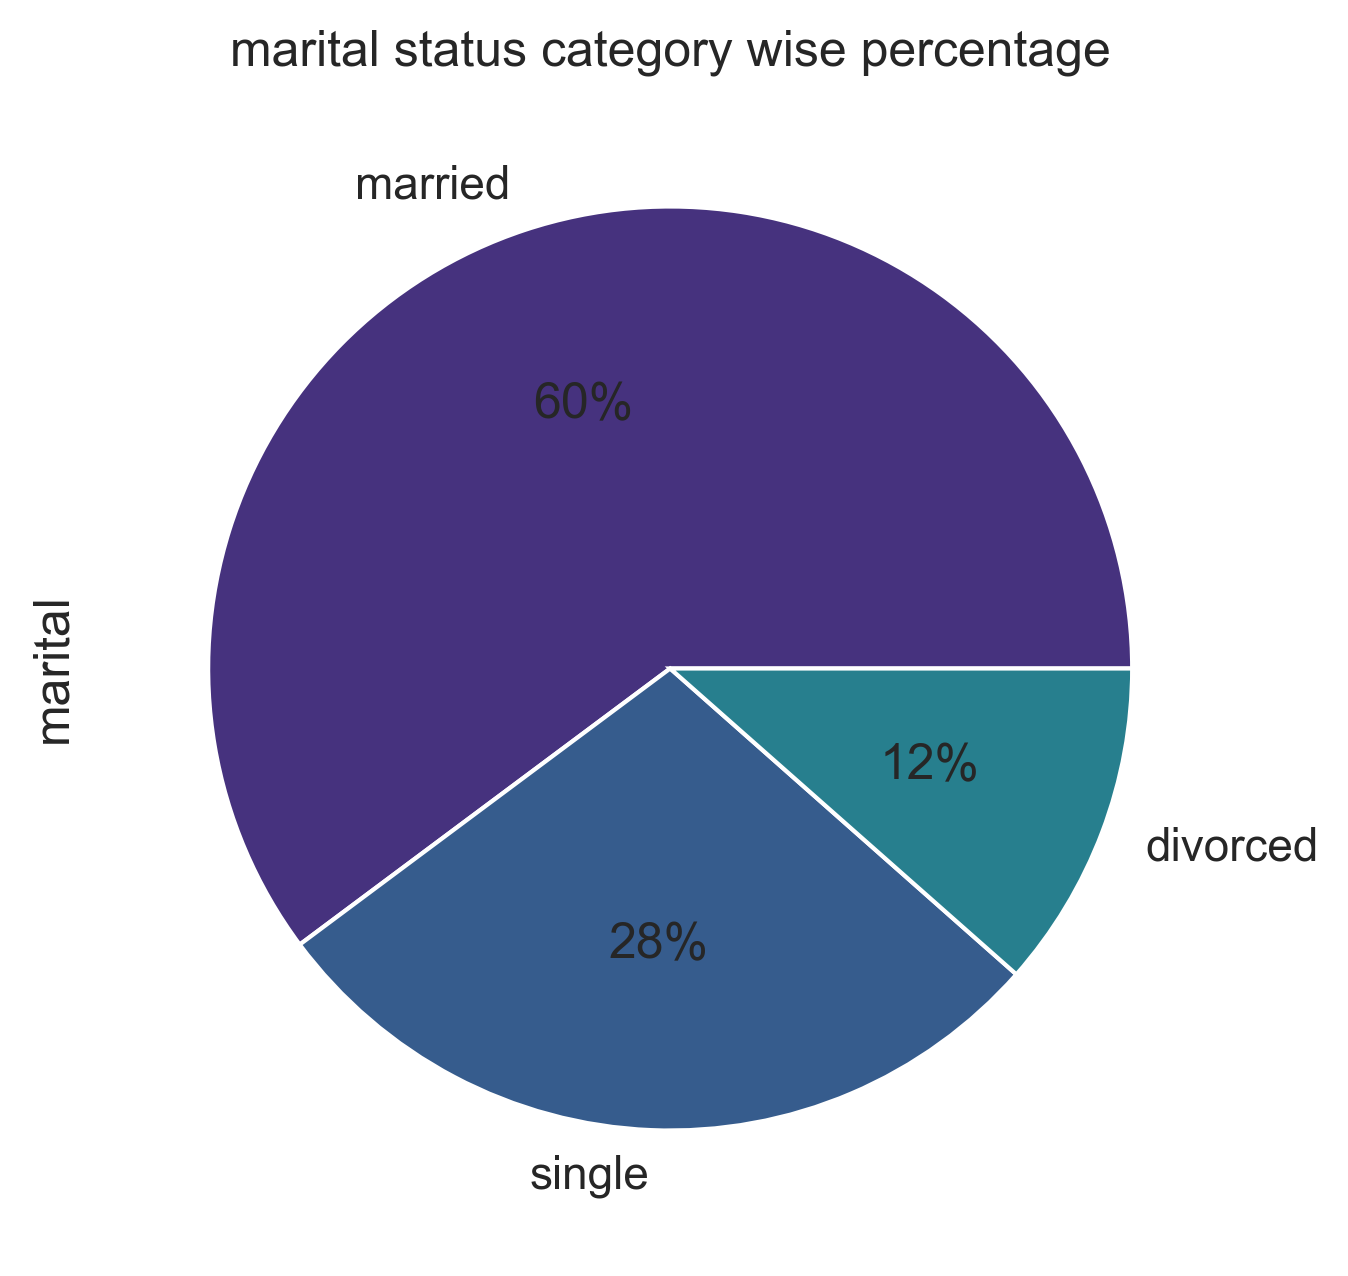

In [15]:
df['marital'].value_counts().plot(kind = 'pie', autopct = '%0.0f%%')
plt.title('marital status category wise percentage')

Text(0.5, 1.0, 'education category percentage')

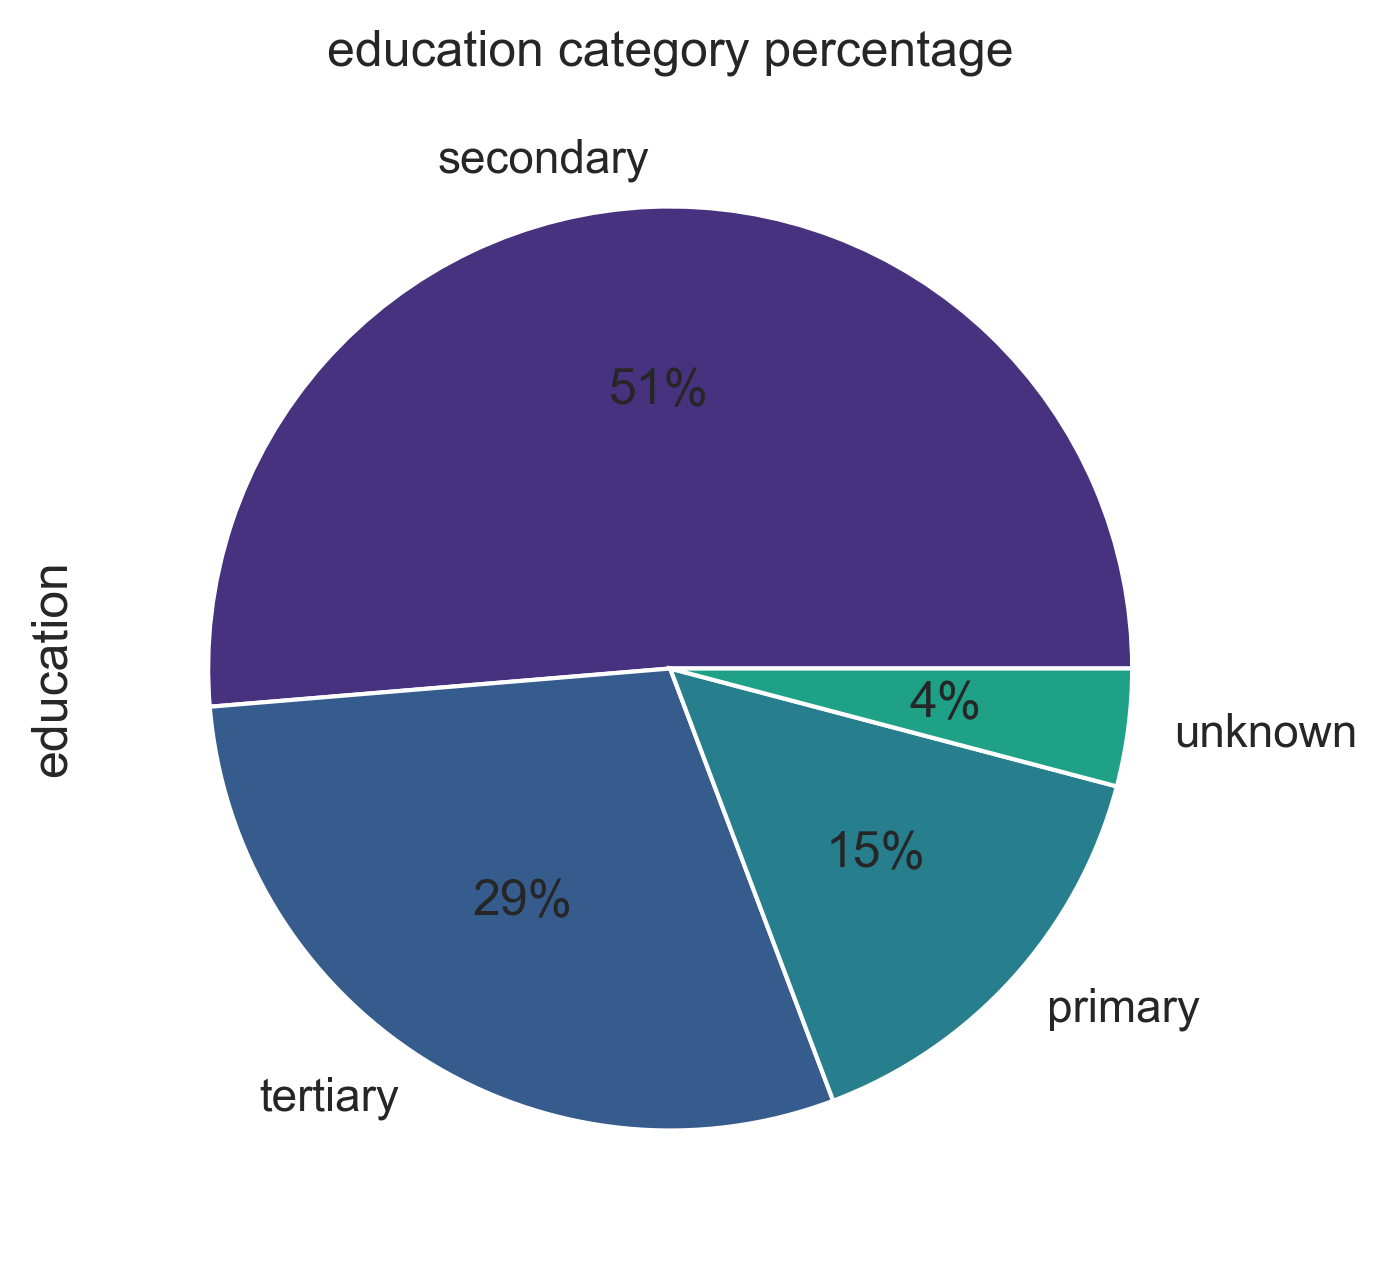

In [16]:
df['education'].value_counts().plot(kind = 'pie', autopct = '%0.0f%%')
plt.title('education category percentage')

In [17]:
#Target data is highly imbalanced

In [18]:
#visualizing only object type data
df[df.select_dtypes(include=['object']).any(axis=1)]

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [19]:
# creating a dataset that contains all the object datatype row from main dataframe
df_categorical = df.select_dtypes('object')
df_categorical.head()

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no

In [20]:
# creating a dataset that contains all the integer datatype row from main dataframe
df_num = df.select_dtypes('int64')
df_num.head()

age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0

In [21]:
# encoding categorical (object) columns using label encoding
for column in df_categorical:
    df_categorical[column] = encoder.fit_transform(df_categorical[column])

In [22]:
df_categorical.head()

job  marital  education  default  housing  loan  contact  month  poutcome  \
0    4        1          2        0        1     0        2      8         3   
1    9        2          1        0        1     0        2      8         3   
2    2        1          1        0        1     1        2      8         3   
3    1        1          3        0        1     0        2      8         3   
4   11        2          3        0        0     0        2      8         3   

   y  
0  0  
1  0  
2  0  
3  0  
4  0

In [23]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        45211 non-null  int32
 1   marital    45211 non-null  int32
 2   education  45211 non-null  int32
 3   default    45211 non-null  int32
 4   housing    45211 non-null  int32
 5   loan       45211 non-null  int32
 6   contact    45211 non-null  int32
 7   month      45211 non-null  int32
 8   poutcome   45211 non-null  int32
 9   y          45211 non-null  int32
dtypes: int32(10)
memory usage: 1.7 MB


In [24]:
# concatination of integer columns and encoded ccategorical columns
df = pd.concat([df_num,df_categorical],axis = 1)

In [25]:
df.head(2)

age  balance  day  duration  campaign  pdays  previous  job  marital  \
0   58     2143    5       261         1     -1         0    4        1   
1   44       29    5       151         1     -1         0    9        2   

   education  default  housing  loan  contact  month  poutcome  y  
0          2        0        1     0        2      8         3  0  
1          1        0        1     0        2      8         3  0

In [26]:
# splitting the data into feature and target variable
x = df.drop('y', axis = 1)
y = df['y']

In [27]:
# train test split of data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [28]:
x_train

age  balance  day  duration  campaign  pdays  previous  job  marital  \
3734    26      102   16        46         1     -1         0    1        2   
28119   43      182   28       152         1     -1         0    4        1   
36942   37      807   12       807         3    172         4    9        1   
4710    32       80   20       614         2     -1         0    1        1   
26402   33        0   20       232         1     -1         0    2        1   
...    ...      ...  ...       ...       ...    ...       ...  ...      ...   
12363   53      931   27       159         2     -1         0    7        1   
5695    50     1651   26        41         2     -1         0    0        2   
8006    33     -244    2        63         2     -1         0    9        2   
17745   52     -299   29       110         2     -1         0    4        0   
17931   43       54   30        62         2     -1         0    9        2   

       education  default  housing  loan  contact  month  poutcome  
3734           0        0        1     0        2      8         3  
28119          2        0        0     0        0      4         3  
36942          1        0        1     0        0      8         0  
4710           0        0        1     0        2      8         3  
26402          2        0        0     0        0      9         3  
...          ...      ...      ...   ...      ...    ...       ...  
12363          0        0        0     0        2      6         3  
5695           1        0        1     0        2      8         3  
8006           1        0        1     0        2      6         3  
17745          2        0        0     0        0      5         3  
17931          1        0        1     0        0      5         3  

[36168 rows x 16 columns]

In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [30]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
# creating a model instance
model  = LogisticRegression()

In [32]:
# training the model
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
#checking model coefficients
model.coef_

array([[ 0.09228328,  0.05831978, -0.0328136 ,  0.99848012, -0.40177749,
         0.36089756,  0.20509605,  0.03131662,  0.1375262 ,  0.16088494,
        -0.05679979, -0.50864785, -0.24231832, -0.57501367,  0.11106299,
         0.21311831]])

In [34]:
# making predictions based on x_test
y_pred = model.predict(x_test)

In [35]:
# accuracy of model
accuracy_score(y_test,y_pred)

0.8909653875926131

In [36]:
confusion_matrix(y_test,y_pred)

array([[7805,  139],
       [ 847,  252]], dtype=int64)

<AxesSubplot:>

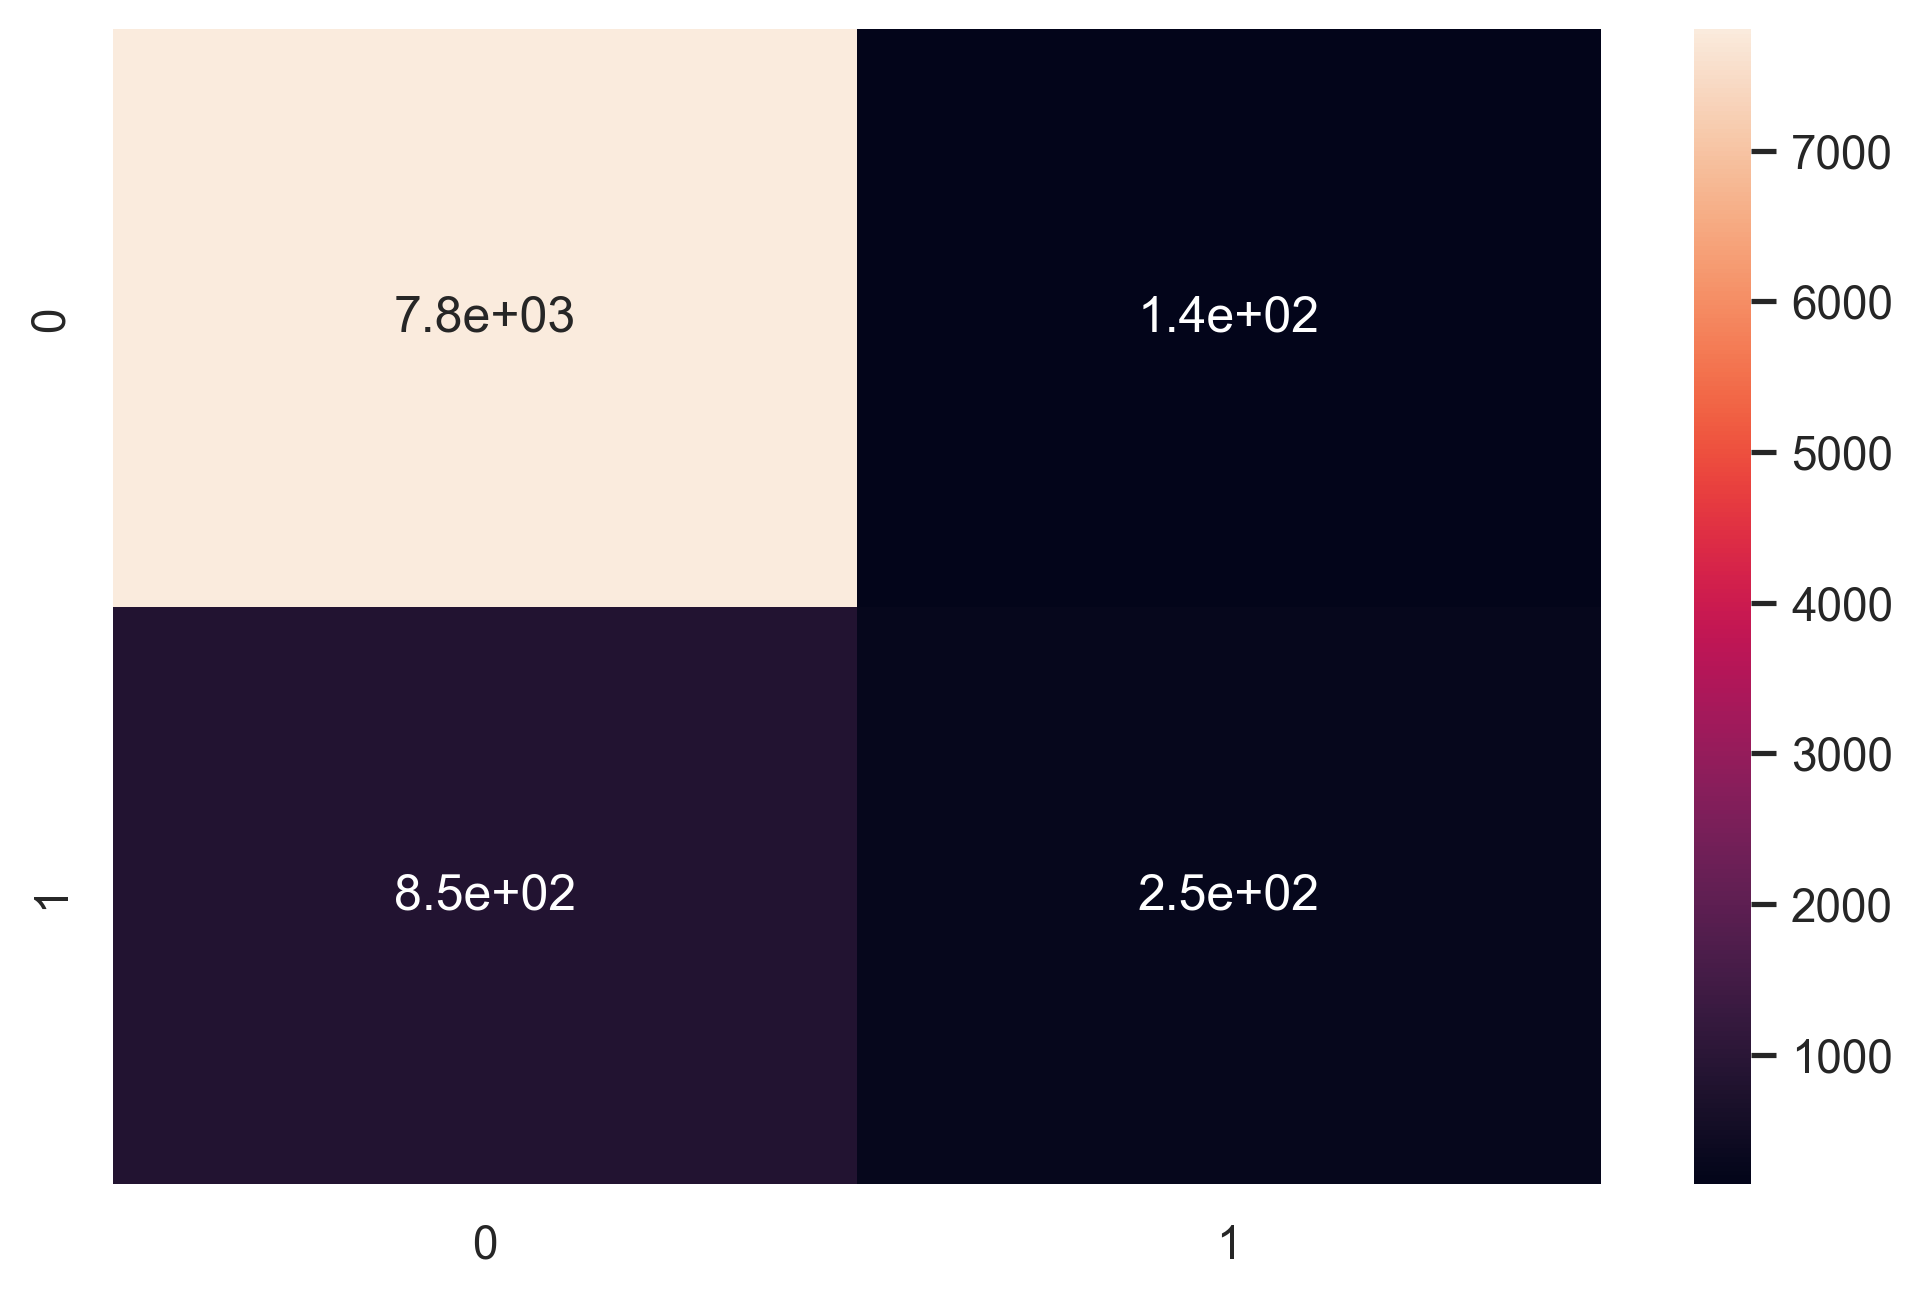

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7944
           1       0.64      0.23      0.34      1099

    accuracy                           0.89      9043
   macro avg       0.77      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



In [39]:
'''
Given the imbalanced nature of the data, relying solely on accuracy may not provide an accurate assessment of the model's performance. Consequently, an evaluation based on both recall and precision becomes crucial.

The model exhibits excellent recall and precision for the class labeled as '0'. This proficiency is expected, considering the higher count of '0's compared to '1's in the dataset. The model accurately predicts instances belonging to the '0' class.

However, the performance metrics for the class labeled as '1' reveal a different story. The imbalance in the counts of '1's and '0's adversely affects both recall and precision for the '1' class, resulting in poorer model predictions for instances belonging to this minority class. Addressing this imbalance may be necessary to improve the model's ability to correctly identify and classify '1' instances.'''

"\nGiven the imbalanced nature of the data, relying solely on accuracy may not provide an accurate assessment of the model's performance. Consequently, an evaluation based on both recall and precision becomes crucial.\n\nThe model exhibits excellent recall and precision for the class labeled as '0'. This proficiency is expected, considering the higher count of '0's compared to '1's in the dataset. The model accurately predicts instances belonging to the '0' class.\n\nHowever, the performance metrics for the class labeled as '1' reveal a different story. The imbalance in the counts of '1's and '0's adversely affects both recall and precision for the '1' class, resulting in poorer model predictions for instances belonging to this minority class. Addressing this imbalance may be necessary to improve the model's ability to correctly identify and classify '1' instances."

In [40]:
# generating probability estimates
proba = model.predict_proba(x_test)[:,1]
proba

array([0.11037539, 0.13141277, 0.01216471, ..., 0.1372033 , 0.08558196,
       0.43246347])

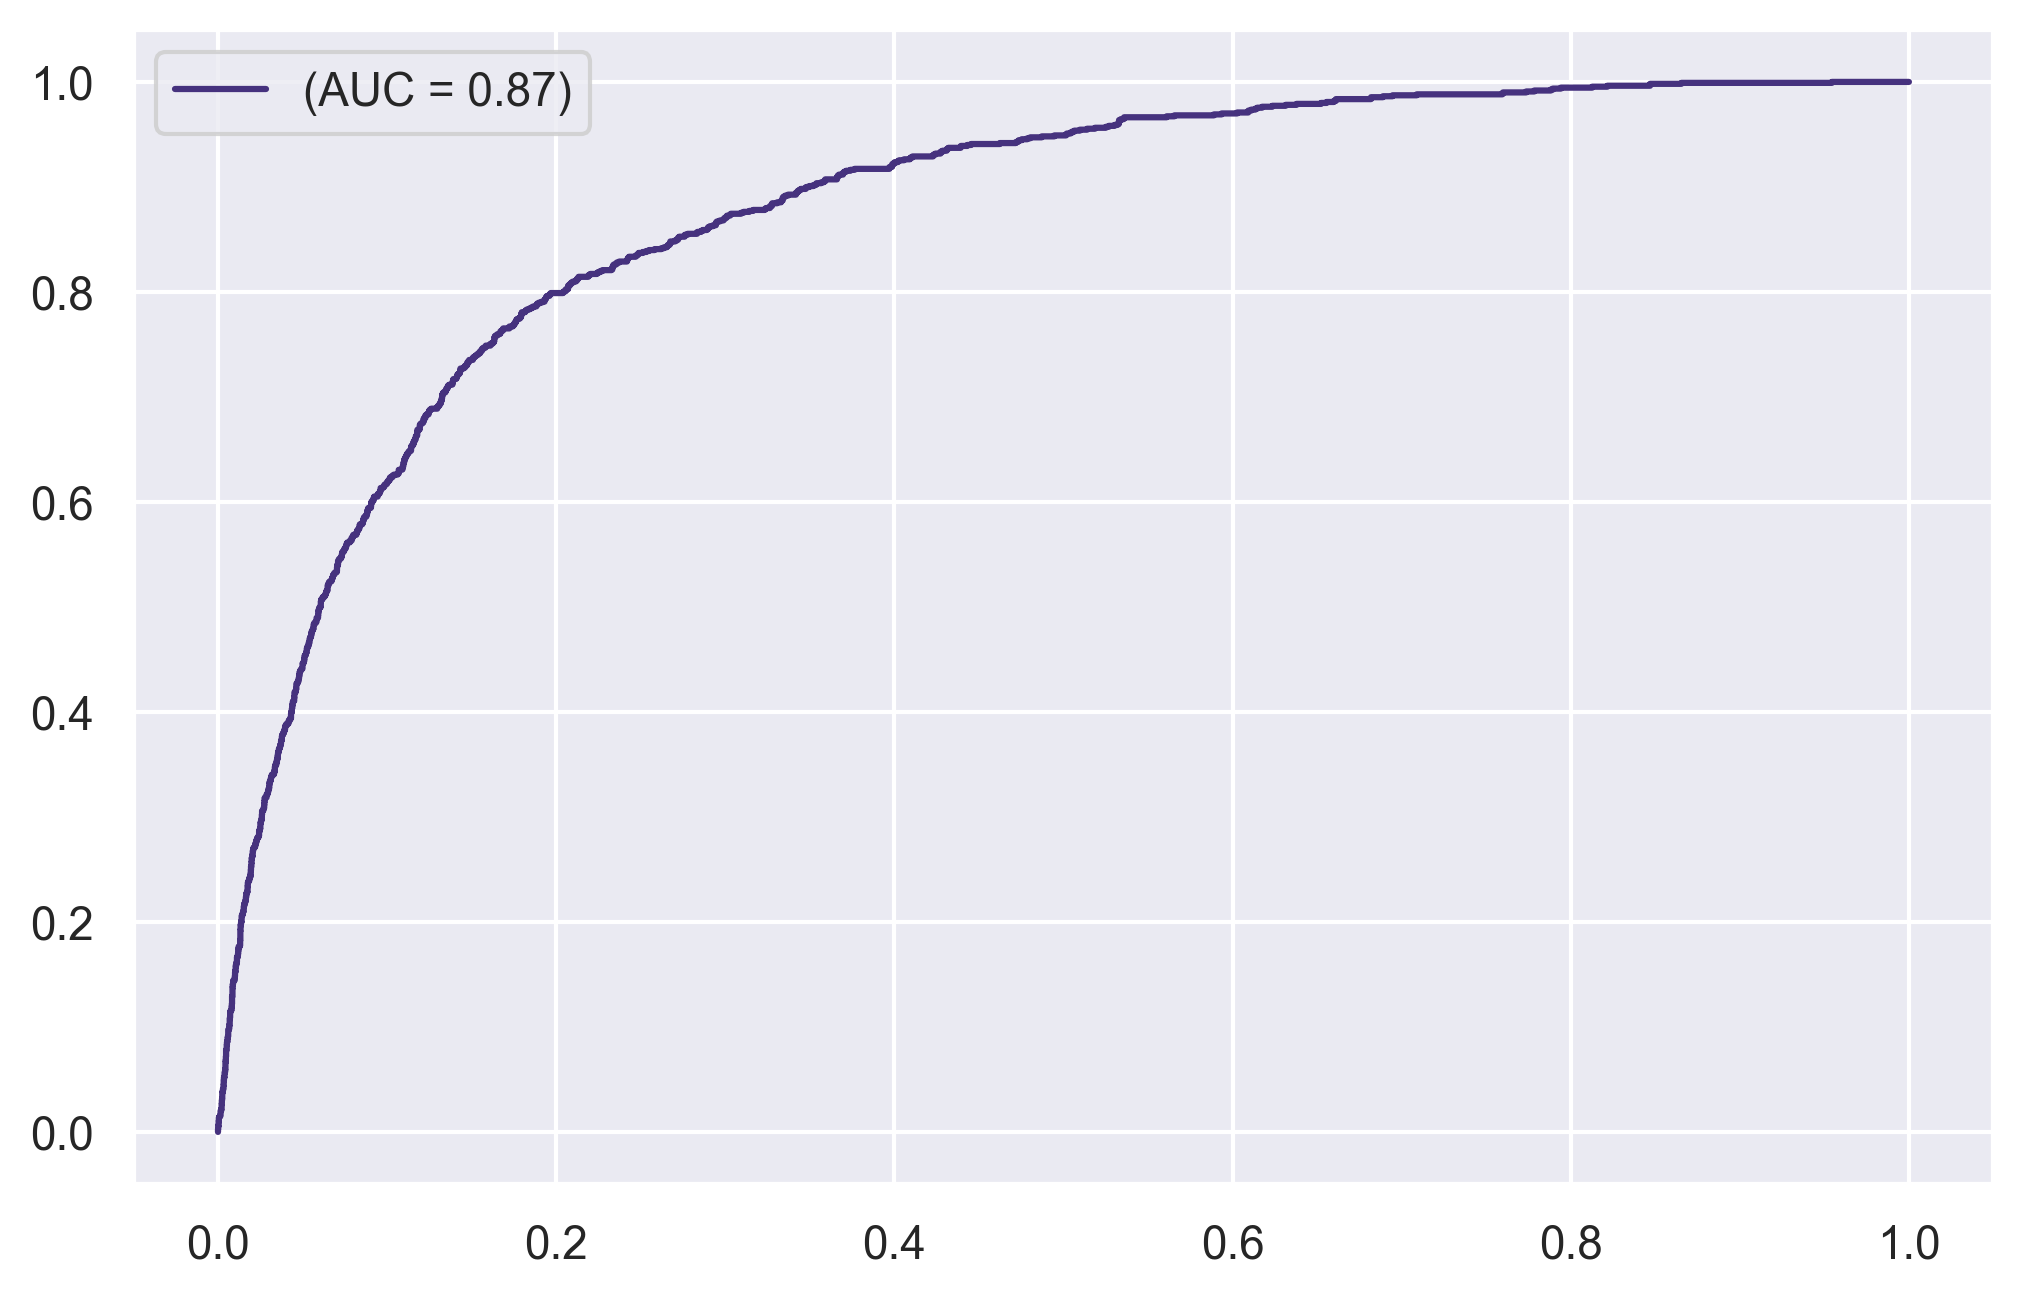

In [41]:
# creating ROC curve
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)
plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [42]:
auc

0.8734124540573825